# AQM Bank marketing data set, classification problem

Link to data: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

By: Nicolai Søndergaard, Davide Bonina & Ravn Arvidsønn Lone-Hurum.

# Libraries

In [1]:
#Dataframe, array and mathematics
import pandas as pd #dataframe
import numpy as np #array and mathematical functions

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns #statistical plot built on top of matplotlib
#sns.set_palette(sns.color_palette('bright')) #Muted gives stronger pastel colors
import pylab as pl
from statsmodels.graphics.regressionplots import plot_partregress_grid

#Econometric
import statsmodels.api as sm #Allows for OLS
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit


#Machine learning
import sklearn
from sklearn.datasets import load_iris #dictionairy like object
from sklearn.linear_model import LogisticRegression #Technically also an econometric model.
from sklearn.metrics import accuracy_score #Accuracy score for
from sklearn.model_selection import train_test_split #Splits data
from sklearn.model_selection import StratifiedShuffleSplit #can create various splits and stratifies naturally
from sklearn.preprocessing import StandardScaler #Normalization of data
from sklearn.metrics import classification_report # predicted values recall etc.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, log_loss #Create and display CM and also show log_loss
from sklearn.linear_model import Ridge #enable ridge regression alone
from sklearn.linear_model import LinearRegression #enable linear regression alone
from sklearn.inspection import permutation_importance #Find important features
from sklearn import metrics
from sklearn.linear_model import RidgeCV #cross validation for ridge to find best lambda
from sklearn.model_selection import cross_val_score #evaluate a score by cross validation
from sklearn.linear_model import LogisticRegressionCV #logistic regression with built in cross validation
from sklearn.model_selection import KFold #K-Folds cross-validator Provides train/test indices to split data in train/test sets. 
#Split dataset into k consecutive folds (without shuffling by default).

The blue/green line is used to seperate main topics



The purple/blue line is used to seperate sub topics


# Importing dataset
Full dataset called "bank-additional-full" containing  (41188) observations and 20 inputs and ordered by date 
(from May 2008 to November 2010) 

 based on UCI description

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=';',index_col=None)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data description

In [3]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The dataset contains 10 numeric attributes/labels
Mean age is 40, with the minimum being 17 and maximum being 98 years old.


In [4]:
data.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


The dataset contains 10 nonnumeric attributes/labels, excluding the target variable y


## Input variables:
### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management',
                       
                       'retired','self-employed','services','student','technician','unemployed','unknown')
    
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate',
               'professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')
    
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
    
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly 
        affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a 
        call is performed. Also, after the end of the call y is obviously known. 
        Thus, this input should only be included for benchmark purposes and should be 
        discarded if the intention is to have a realistic predictive model.
        
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
13 - pdays: number of days that passed by after the client was last contacted from a previous 
    campaign (numeric; 999 means client was not previously contacted)
    
14 - previous: number of contacts performed before this campaign and for this client (numeric)
    
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Data analysis
Includes exploratory, univariate, bivariate and multivarite analysis.

### Basics
Including the shape and info of the data, checking for missing values etc.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.shape

(41188, 21)

In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
for col in data:
    print(f'{col}: {data[col].unique()}')

age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
duration: [ 261  149  226 ... 1246 1556 1868]
campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43

It can be assumed based on the two lines of code above, that there are no missing values in this dataset.

There are 41.188 observations in the dataset as stated on the UCI webpage

Furthermore, there is a combination of intergers, floats and categorial variables

## Univariate analysis

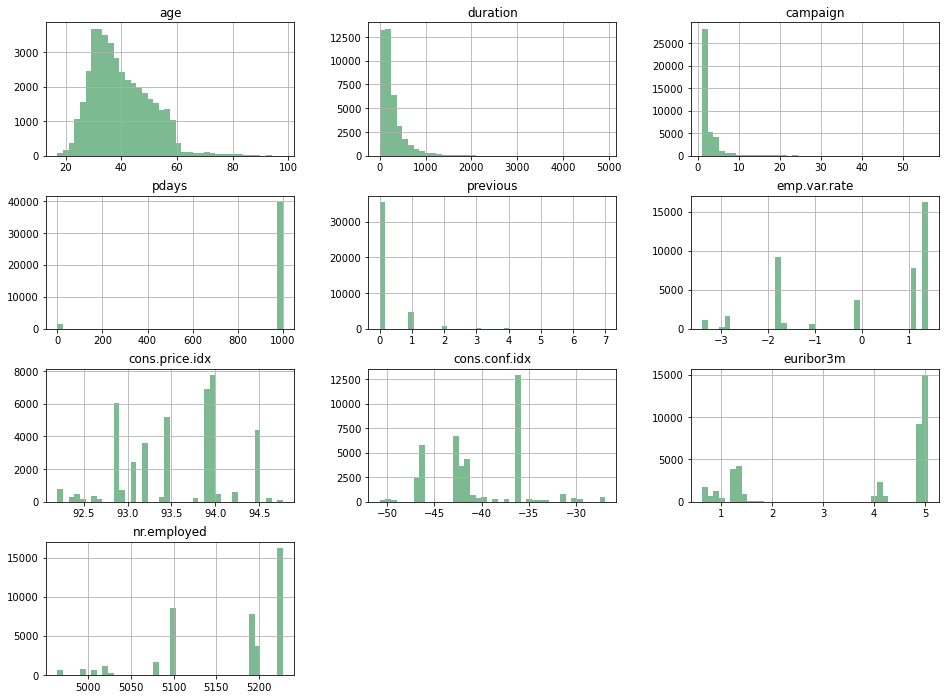

In [9]:
#List of colors https://matplotlib.org/stable/gallery/color/named_colors.html
data.hist(bins=40, figsize=(16,12), color = sns.set_palette(sns.color_palette('crest'))) 
#color = 'dodgerblue' -> For a sharp blue color.
plt.show()

Histogram of each of the numeric variables

Text(0.5, 1.0, 'Job distribution')

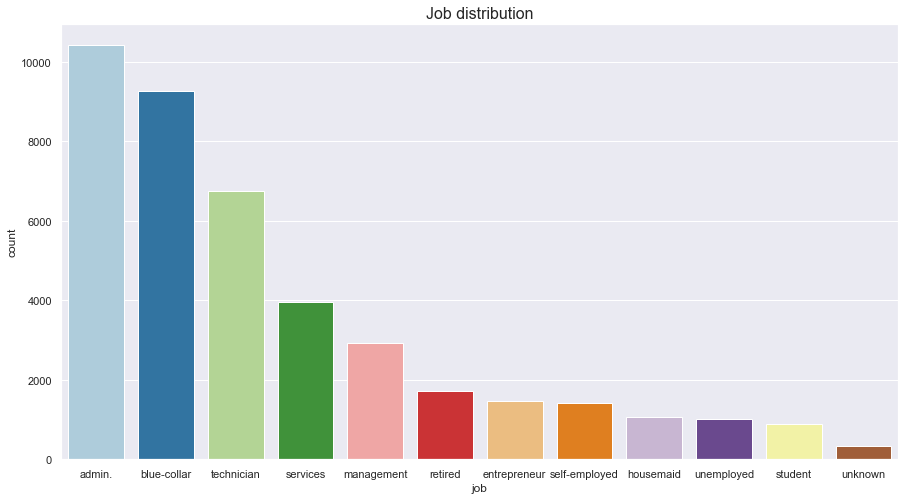

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='job', data=data, order = data['job'].value_counts().index)
plt.title('Job distribution', fontsize=16)

Potential grouping: 0, blue collar, 1. white collar, 2. Not working, 3. service jobs, 4. self-employed (tho maybe too small segment)

Text(0.5, 1.0, 'Marital status counted distribution')

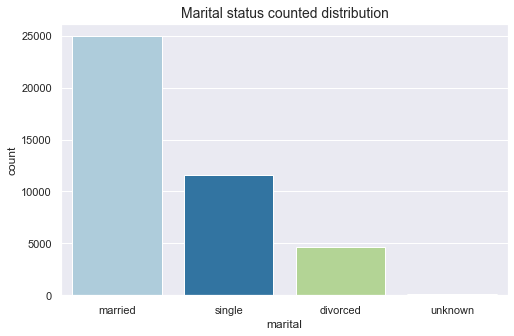

In [11]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='marital', data=data)
plt.title('Marital status counted distribution', fontsize=14)

Text(0.5, 1.0, 'Distribution of education')

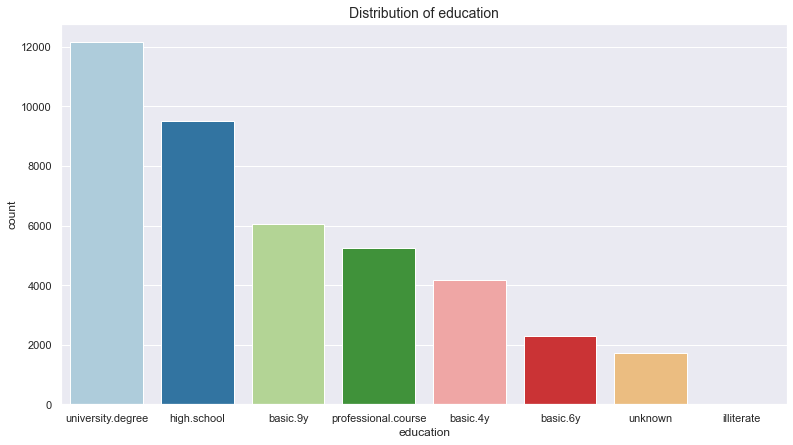

In [12]:
sns.set(rc = {'figure.figsize':(13,7)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='education', data=data,order = data['education'].value_counts().index)
plt.title('Distribution of education', fontsize=14)

Text(0.5, 1.0, 'Has credit in default')

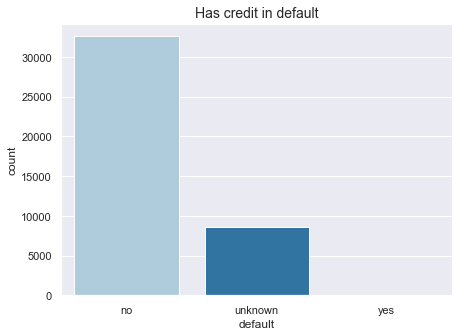

In [13]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='default', data=data,order = data['default'].value_counts().index)
plt.title('Has credit in default', fontsize=14)

No grouping required

Text(0.5, 1.0, 'Has housing loan')

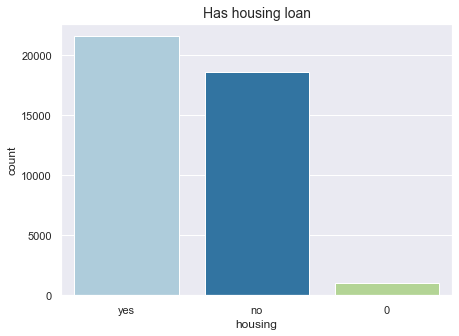

In [60]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='housing', data=data,order = data['housing'].value_counts().index) #Value counts find frequency of a series
#Shows ind descending order
plt.title('Has housing loan', fontsize=14)

No grouping required

Text(0.5, 1.0, 'Has personal loan')

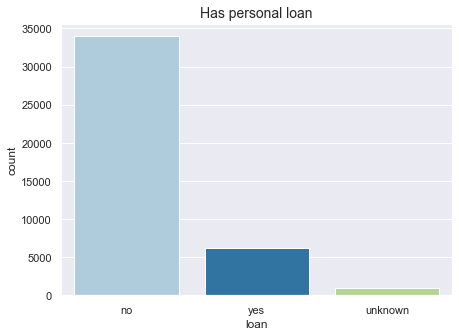

In [15]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='loan', data=data,order = data['loan'].value_counts().index)
#The index() method returns the position at the first occurrence of the specified value.
plt.title('Has personal loan', fontsize=14)

No grouping required 

Text(0.5, 1.0, 'Communication type')

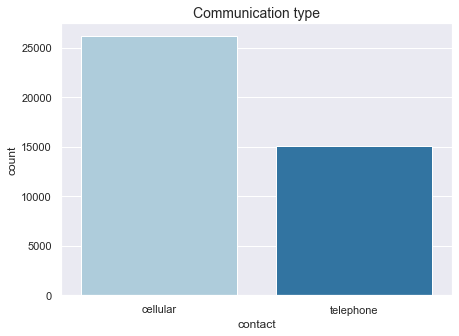

In [16]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='contact', data=data,order = data['contact'].value_counts().index)
plt.title('Communication type', fontsize=14)

No Grouping required

Text(0.5, 1.0, 'Last contact month')

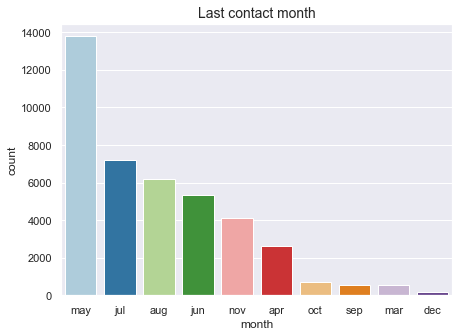

In [17]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='month', data=data,order = data['month'].value_counts().index)
plt.title('Last contact month', fontsize=14)

Text(0.5, 1.0, 'Last contact day')

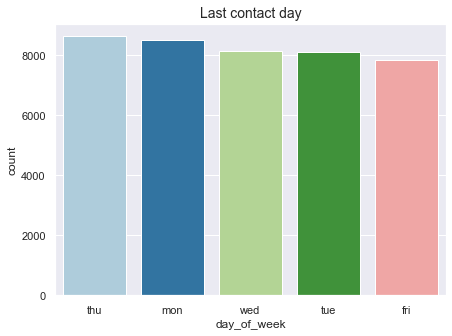

In [18]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='day_of_week', data=data,order = data['day_of_week'].value_counts().index)
plt.title('Last contact day', fontsize=14)

Text(0.5, 1.0, 'outcome of previous marketing campaign')

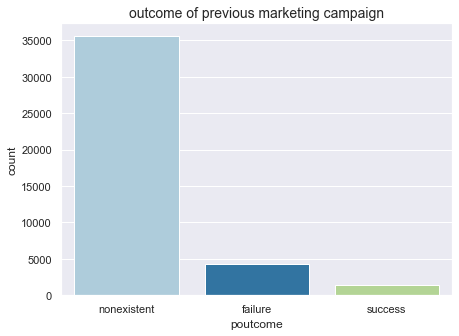

In [19]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='poutcome', data=data,order = data['poutcome'].value_counts().index)
plt.title('outcome of previous marketing campaign', fontsize=14)

No grouping necessary.

## Bivariate analysis

<AxesSubplot:xlabel='y', ylabel='age'>

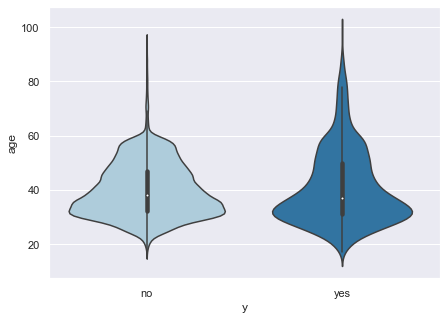

In [20]:
#relationship between target variable y and age
sns.set_palette(sns.color_palette('Paired'))
sns.violinplot(data=data, x='y', y='age')

<AxesSubplot:xlabel='marital', ylabel='age'>

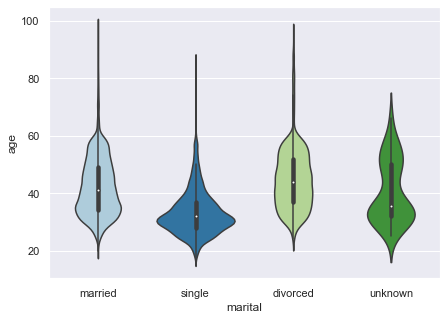

In [21]:
#relationship between target variable marital status and age
sns.set_palette(sns.color_palette('Paired'))
sns.violinplot(data=data, x='marital', y='age')

<AxesSubplot:title={'center':'Marital status and y'}>

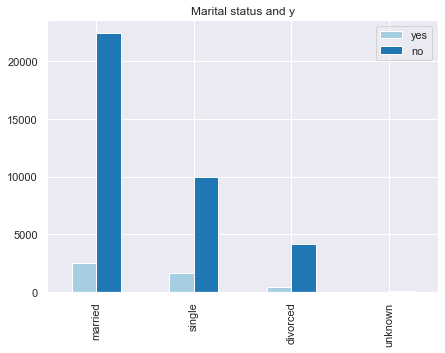

In [22]:
#marital status and y
test_m = pd.DataFrame()

test_m['yes'] = data[data['y'] == 'yes']['marital'].value_counts()
test_m['no'] = data[data['y'] == 'no']['marital'].value_counts()
sns.set_palette(sns.color_palette('Paired'))
test_m.plot.bar(title = 'Marital status and y')

<AxesSubplot:title={'center':'Education and y'}>

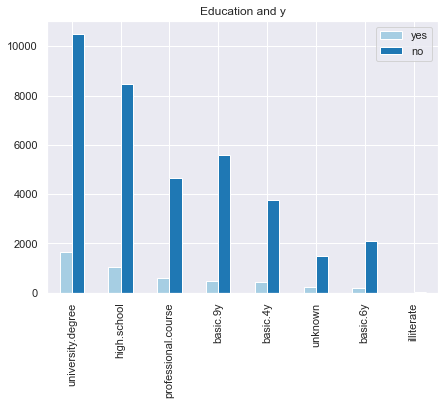

In [23]:
#education and y
test_e = pd.DataFrame()

test_e['yes'] = data[data['y'] == 'yes']['education'].value_counts()
test_e['no'] = data[data['y'] == 'no']['education'].value_counts()

sns.set_palette(sns.color_palette('Paired'))
test_e.plot.bar(title = 'Education and y')

<AxesSubplot:title={'center':'loan and y'}>

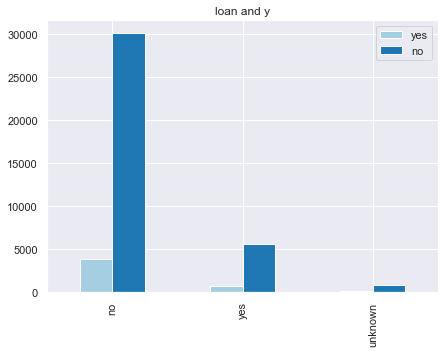

In [24]:
#loan and y
test_l = pd.DataFrame()

test_l['yes'] = data[data['y'] == 'yes']['loan'].value_counts()
test_l['no'] = data[data['y'] == 'no']['loan'].value_counts()

sns.set_palette(sns.color_palette('Paired'))
test_l.plot.bar(title = 'loan and y')

<AxesSubplot:xlabel='job', ylabel='age'>

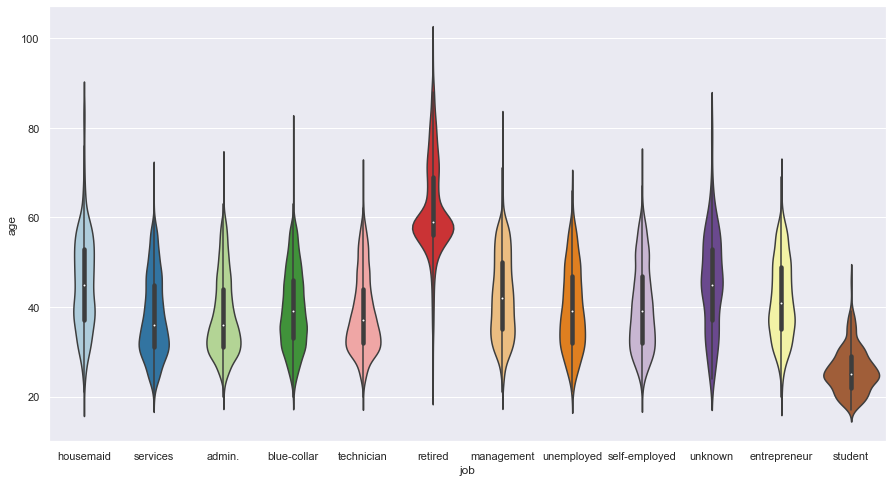

In [25]:
#relationship between target job and age
#White dot median, fat black line interquartile range, thin black line 1,5x interquartile range except outliers
#Fatter -> Higher probability, 
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_palette(sns.color_palette('Paired'))
sns.violinplot(data=data, x='job', y='age')

<AxesSubplot:title={'center':'loan and y'}>

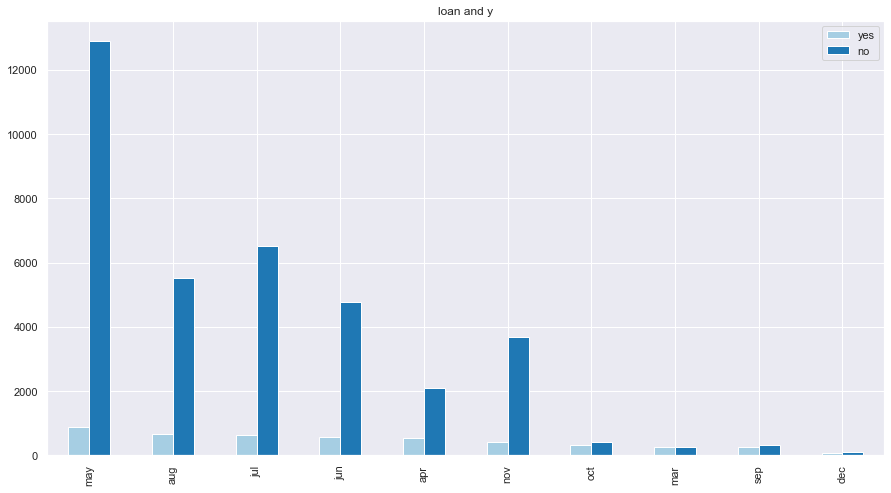

In [26]:
#loan and y
test_m2 = pd.DataFrame()

test_m2['yes'] = data[data['y'] == 'yes']['month'].value_counts()
test_m2['no'] = data[data['y'] == 'no']['month'].value_counts()

sns.set_palette(sns.color_palette('Paired'))
test_m2.plot.bar(title = 'loan and y')

Despite the largest amount of last contacts being in May, that did not translate into a subscribed term deposit compared to e.g. August.

split them in Spring, Summer, Autumn and Winter to lower amount of features and group features with few observations

## Multivariate analysis

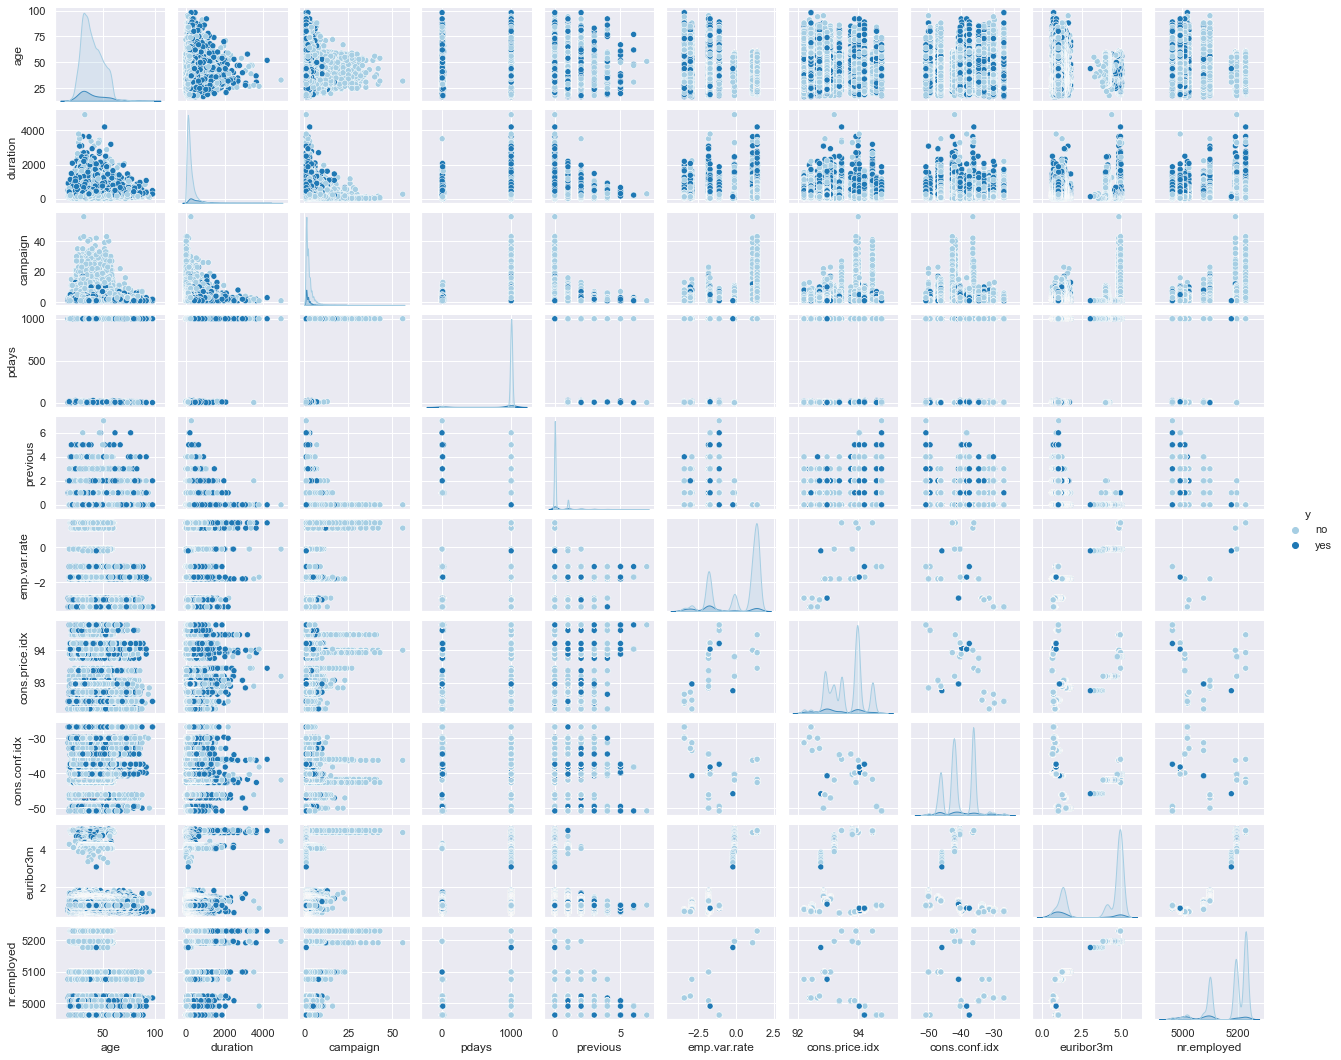

In [27]:
# Shows the relationship between all the variables and further showcasing relationships by dependent variable y.
sns.pairplot(data,hue='y', height=1.5, aspect=1.2)
plt.show()

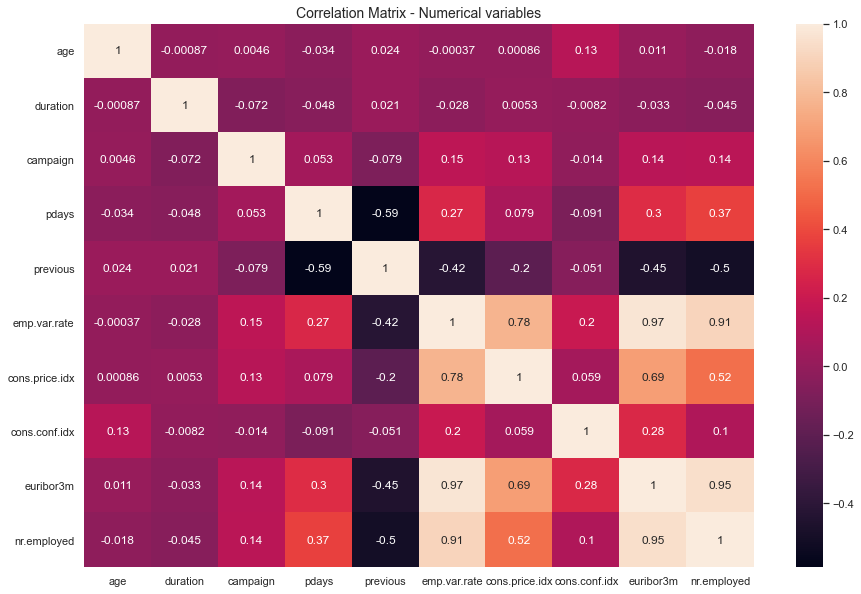

In [28]:
#Heatmap of numeric variables
numeric_data = data.select_dtypes(exclude='object')
numeric_correl = numeric_data.corr()

sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(numeric_correl, cbar=True, annot=True)# can use linewidths=.4 to have space between boxes
plt.title("Correlation Matrix - Numerical variables", fontsize=14)
plt.show()

Fairly high levels of positive correlation between some variables, as well as some negative correlation between variables can be observed

<AxesSubplot:xlabel='job', ylabel='age'>

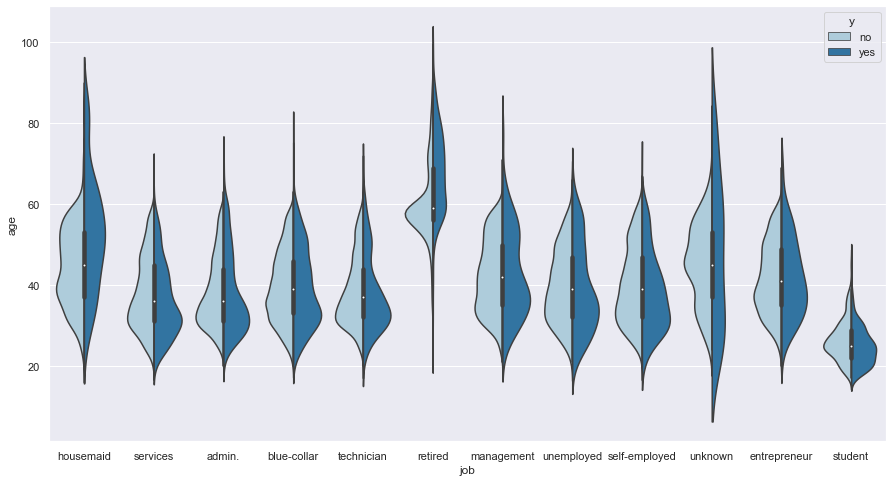

In [29]:
#Violin plot shows distribution of entire data compared to box plot that just shows mean, interquartiles ranges.
#relationship between target job, age and target variable y
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_palette(sns.color_palette('Paired'))
sns.violinplot(data=data, x='job', y='age', hue='y', split=True)
#sns.swarmplot(data=data, x="job", y="age",color='black',size=1) -> Additional visualization but not 
                                                                    #feasible due to size of dataset.


# Benchmark - Naive Model
 the naive model is the easiest prediction available. In this case, without running any complex model we have a prediction of 88.7% accurate. Meaning that only looking at the data from a descriptive point of view we may conclude that 11.2% of the sample subscribed a term deposit. Therefore we can assume that we can predict with 88.7% accuracy that a person did not subscribe a term deposit

In [58]:
#benchmark
data['y'].value_counts(normalize=True) #Show percentage split of no and yes after counting values.

0    0.887346
1    0.112654
Name: y, dtype: float64

Text(0, 0.5, '')

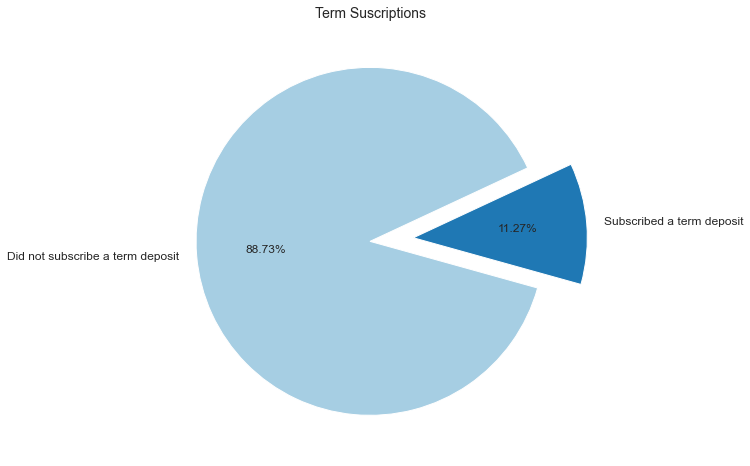

In [31]:
figure, ax = pl.subplots(1,1)
sns.set(rc = {'figure.figsize':(8,5)})
sns.set_palette(sns.color_palette('Paired'))
labels ="Did not subscribe a term deposit", "Subscribed a term deposit"
data["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%',ax=ax, #make pacman, show percentage, change labels
                                         fontsize=12, labels=labels,startangle=25)
plt.title('Term Suscriptions', fontsize=14)
pl.ylabel('') #Hides the othervise visible y label just saying y

# Grouping and feature engineering 
With the aim to combat overfitting and to remove comebine irrelevant features, we group and transform
several attributes.

In [32]:
#Making Marital status binary
#Marriage is 1, Not married 0
data.replace(['married','single','divorced','unknown'],
             ['1','0','0','0'], inplace = True)

In [33]:
#making function to make y numerical
def y_data(y):
    if y == 'yes': 
        return 1
    else:
        return 0
    
#Making y numerical.
#yes = 1, no = 0
data['y'] = data['y'].apply(y_data)
#data.head(1)

In [34]:
#Simplifying education from 8 to 4 features.
#Group basic education, unknown and illiterate, everything else alone.
data.replace([ 'basic.9y','basic.6y','basic.4y','high.school',
             'unknown','illiterate','professional.course','university.degree'],
             ['Basic education','Basic education','Basic education','high school','Unknown','unknown',
              'professional course','university degree'], inplace = True)

In [35]:
#Simplifying month from 10 to 4 features.
#december may be irrelevant as its alone in winter since there is no data from jan or feb.
#Maybe shouldn't simplify or do it differently.
#dec, !jan, !feb = winter(0) - mar, apr, may = spring(1) - jun, jul, aug = summer(2) - sep, oct, nov = autumn(3)
data.replace(['dec','mar','apr','may','jun','jul','aug','sep','oct','nov'],
             ['0','1','1','1','2','2','2','3','3','3'], inplace = True)

# Encoding variables and creating a X and Y

In [36]:
#Creating dummies / converting categorical variables into dummy variables.
hot_encoded = pd.get_dummies(data)

In [37]:
#Dropping missing values
hot_encoded= hot_encoded.dropna()

In [38]:
hot_encoded.columns #Shows all columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_0', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_0', 'marital_1', 'education_0', 'education_Basic education',
       'education_high school', 'education_professional course',
       'education_university degree', 'education_unknown', 'default_0',
       'default_no', 'default_yes', 'housing_0', 'housing_no', 'housing_yes',
       'loan_0', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_0', 'month_1', 'month_2', 'month_3',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [39]:
#Creates Y
Y = hot_encoded['y'] 

In [40]:
#Dropping the target variable y from the X dataset as well as duration to get a realistic model as described on UCI
X = hot_encoded.drop(['y','duration'],axis=1)

## Train_test_split

In [41]:
#Trying to make a different way than we usually do.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=25,stratify=Y, test_size=0.3) 
                                    # setting seed and specifying
                                    #That we want to get the same split of y in train and test + a 30% test size.

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Linear regression - Train_test_split

In [42]:
xcon = sm.add_constant(X_train) #add intercept
model = sm.OLS(Y_train, xcon) #perform OLS regression
results = model.fit() #Fit regression line to the data
print(results.summary()) #Prints table below

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     181.6
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        08:56:52   Log-Likelihood:                -4395.9
No. Observations:               28831   AIC:                             8876.
Df Residuals:                   28789   BIC:                             9223.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1127      0.002     67.825      0.0

# Logistic Regression - Using train_test_split - Without penalty

A high C value basically says = TRUST THE TRAIN DATA, a low C value basically says= DONT TRUST THE DATA
https://stackoverflow.com/questions/67513075/what-is-c-parameter-in-sklearn-logistic-regression



C:\Users\snder\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Train accuracy: 
 0.9006458505317341
Test accuracy: 
 0.8977098001132962
Train restults: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     18273
           1       0.67      0.24      0.35      2320

    accuracy                           0.90     20593
   macro avg       0.79      0.61      0.65     20593
weighted avg       0.88      0.90      0.88     20593

Test restults: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     10965
           1       0.63      0.22      0.32      1392

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



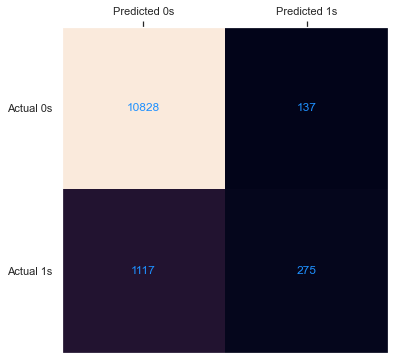

Fraction of correct predictions:  0.8985190580237922


In [62]:
logreg = LogisticRegression(C=9999999999999, max_iter=1200, penalty='none') 
logreg.fit(X_train, Y_train) #Training model

pred_train = logreg.predict(X_train) #Predict values on train set
prob = logreg.predict_proba(X_test) #class probability 0 or 1 in a float
pred_test = logreg.predict(X_test) #Predict values on test set
print("Train accuracy: \n", accuracy_score(Y_train, pred_train)) #Accuracy checked based on actual vals vs predicted
print("Test accuracy: \n", accuracy_score(Y_test, pred_test))
' \n'

print("Train restults: \n", classification_report(Y_train, pred_train)) #train dataset
' \n'

print("Test restults: \n", classification_report(Y_test, pred_test)) #test dataset

' \n'

pred_test = 1*(prob[:,1] > 0.54) #if probability is above 0.54 classify it as 1
cm = confusion_matrix(Y_test, pred_test) #Create confusion matrix with correct and predicted values
disp = ConfusionMatrixDisplay(confusion_matrix=cm) #Display it

frac_correct = (cm[0,0]+cm[1,1])/len(Y_test) #Add values together and divide by length of ytest to get correct predictions accu
                              # display_labels=clf.classes_)

' \n'
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm) #Display data as an image
ax.grid(False) #Remove grids
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) #name of labels
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top() #Put x axis to the top
ax.set_ylim(1.5, -0.5) #Sets yaxis view limits
for i in range(2): #Specifications for text, without this theres no text 
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='dodgerblue')

plt.show() #Visualize
print("Fraction of correct predictions: ", frac_correct) #Print frac_correct

## Finding the optimal threshold for the confusion matrix

In [44]:
#Looping through values form 0 to 1, making it  a dictionairy.
best = {}
f = np.arange(0.01,1,0.01)
for i in f:
    pred_test = 1*(prob[:,1] > i)
    cm = confusion_matrix(Y_test, pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    frac_correct = (cm[0,0]+cm[1,1])/len(Y_test)
                              # display_labels=clf.classes_)
    best[i] = frac_correct
    best[i] = {}
    best[i]['frac_correct'] = frac_correct

In [45]:
#Saving it to a dataframe and sorting to find best value
pd.DataFrame(best)
best1 = pd.DataFrame(best)
best2 = best1.T
best2['frac_correct'].sort_values(ascending=False)

0.54    0.898600
0.50    0.898438
0.51    0.898438
0.57    0.898357
0.53    0.898357
          ...   
0.05    0.457069
0.04    0.305171
0.03    0.171482
0.02    0.119204
0.01    0.113053
Name: frac_correct, Length: 99, dtype: float64

<AxesSubplot:xlabel='age', ylabel='y'>

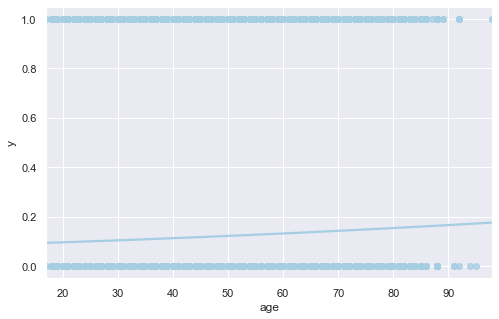

In [46]:
#define the predictor variable and the response variable
x = hot_encoded['age']
y = hot_encoded['y']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=hot_encoded, logistic=True, ci=None)

# Train Validation Test Split for logreg with ridge regression
50/20/30 as per instructions when using a tuning parameter

In [47]:
#Making initial train and test split
X_main, X_test, Y_main, Y_test = train_test_split(X, Y,random_state=25,stratify=Y, test_size=0.3) 
                                    # setting seed and specifying
                                    #That we want to get the same split of y in train and test + a 30% test size.

#Creating validation split and new train set off initial split.
X_train, X_val,Y_train,Y_val = train_test_split(X_main,Y_main, random_state=25, stratify=Y_main, test_size=0.28572) 

#Normalizing features 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [63]:
#Checking shape of splits
print('Fraction of observations in train', X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]+ X_val.shape[0]))
print('Fraction of observations in Test', X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]+ X_val.shape[0]))
print('Fraction of observations in Validation', X_val.shape[0]/(X_train.shape[0]+X_test.shape[0]+ X_val.shape[0]))

#Could also have added together the length or each or used the sum function on the legnth of the three.

Fraction of observations in train 0.49997572108381083
Fraction of observations in Test 0.3000145673497135
Fraction of observations in Validation 0.20000971156647568


# Logistic regression with L2 pentalty and solver used

Train accuracy: 
 0.900791531102802
Test accuracy: 
 0.8986809096058914
Train restults: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     18273
           1       0.67      0.23      0.34      2320

    accuracy                           0.90     20593
   macro avg       0.79      0.61      0.65     20593
weighted avg       0.88      0.90      0.88     20593

Test restults: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     10965
           1       0.65      0.22      0.33      1392

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



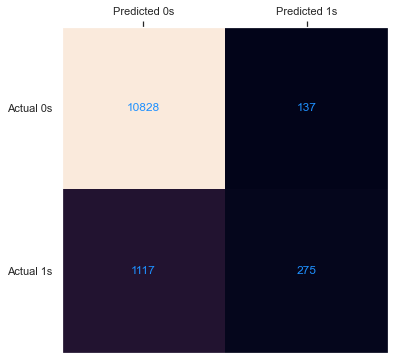

Fraction of correct predictions:  0.8985190580237922


In [49]:
logreg = LogisticRegression(C=0.0483293, max_iter=11200, solver='lbfgs', penalty='l2')  #Solver lbfgs is standard, penalty also standard.
logreg.fit(X_train, Y_train) #C value = 0.0483293 optimal value

pred_train = logreg.predict(X_train)
prob = logreg.predict_proba(X_test)
pred_test = logreg.predict(X_test)
print("Train accuracy: \n", accuracy_score(Y_train, pred_train))
print("Test accuracy: \n", accuracy_score(Y_test, pred_test))
' \n'

print("Train restults: \n", classification_report(Y_train, pred_train)) #train dataset
' \n'

print("Test restults: \n", classification_report(Y_test, pred_test)) #test dataset

' \n'

pred_test = 1*(prob[:,1] > 0.54)
cm = confusion_matrix(Y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

frac_correct = (cm[0,0]+cm[1,1])/len(Y_test)
                              # display_labels=clf.classes_)

' \n'
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='dodgerblue')

plt.show()
print("Fraction of correct predictions: ", frac_correct)

#precision -> Ratio of correctly predicted positive observations to the total predicted positive observations
#Recall -> Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes
#F1 -> weighted average of precision and recall. Good in uneven class distribution cases.

In [50]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.9875057  0.19755747]
The Precision is: [0.90648807 0.66747573]
The False positive rate is: [0.80244253 0.0124943 ]
The False Negative Rate is:  [0.0124943  0.80244253]

The average TPR is: 0.5925315856093841
The average Precision is: 0.7869818992388252
The average False positive rate is: 0.4074684143906159
The average False Negative Rate is: 0.4074684143906159


In [51]:
#Looping through values form 0 to 1, making it  a dictionairy.
fest = {}
f = np.arange(0.01,1,0.01)
for i in f:
    pred_test = 1*(prob[:,1] > i)
    cm = confusion_matrix(Y_test, pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    frac_correct = (cm[0,0]+cm[1,1])/len(Y_test)
                              # display_labels=clf.classes_)
    fest[i] = frac_correct
    fest[i] = {}
    fest[i]['frac_correct'] = frac_correct

In [52]:
#Saving it to a dataframe and sorting to find best value
pd.DataFrame(best)
fest1 = pd.DataFrame(best)
fest2 = best1.T
fest2['frac_correct'].sort_values(ascending=False)

0.54    0.898600
0.50    0.898438
0.51    0.898438
0.57    0.898357
0.53    0.898357
          ...   
0.05    0.457069
0.04    0.305171
0.03    0.171482
0.02    0.119204
0.01    0.113053
Name: frac_correct, Length: 99, dtype: float64

<AxesSubplot:xlabel='age', ylabel='y'>

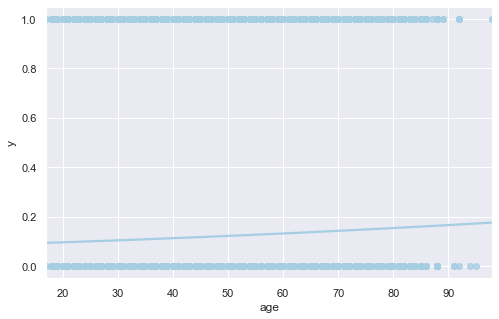

In [53]:
#define the predictor variable and the response variable
x = hot_encoded['age']
y = hot_encoded['y']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=hot_encoded, logistic=True, ci=None)

# Log reg ridge on validation split

Train accuracy: 
 0.900791531102802
Validation accuracy: 
 0.9002184996358339
Train restults: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     18273
           1       0.67      0.23      0.34      2320

    accuracy                           0.90     20593
   macro avg       0.79      0.61      0.65     20593
weighted avg       0.88      0.90      0.88     20593

Validation restults: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.68      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



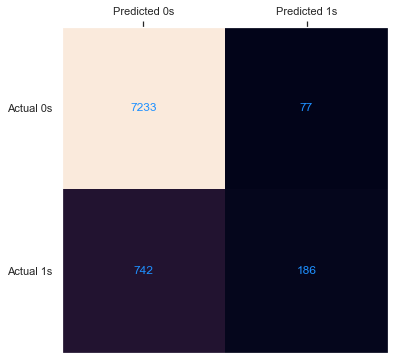

Fraction of correct predictions:  0.9005826656955572


In [64]:
logreg = LogisticRegression(C=0.0483293, max_iter=11200, solver='lbfgs', penalty='l2')  #Solver lbfgs is standard, penalty also standard.
logreg.fit(X_train, Y_train) #C value = 0.0483293 optimal value

pred_train = logreg.predict(X_train)
prob = logreg.predict_proba(X_val)
pred_test = logreg.predict(X_val)
print("Train accuracy: \n", accuracy_score(Y_train, pred_train))
print("Validation accuracy: \n", accuracy_score(Y_val, pred_test))
' \n'

print("Train restults: \n", classification_report(Y_train, pred_train)) #train dataset - Checks predictions vs actual values
' \n'

print("Validation restults: \n", classification_report(Y_val, pred_test)) #validation dataset

' \n'

pred_test = 1*(prob[:,1] > 0.54) #If probability is above 0.54, classify it as 1
cm = confusion_matrix(Y_val, pred_test) #Create a confusion matrix with correct and predicted y values.
disp = ConfusionMatrixDisplay(confusion_matrix=cm) #visualize it.

frac_correct = (cm[0,0]+cm[1,1])/len(Y_val) #Add all values together and divide by length of yval
                              # display_labels=clf.classes_)

' \n'
fig, ax = plt.subplots(figsize=(6, 6)) #More easy to customize
ax.imshow(cm) #Display data as an image, i.e., on a 2D regular raster.
ax.grid(False) #Don't show grid
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))# set name of labels
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top() #Set position of x axis
ax.set_ylim(1.5, -0.5) #sets y axis view limits
for i in range(2):#Specifications for the text (else there won't be any text at all)
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='dodgerblue')

plt.show()
print("Fraction of correct predictions: ", frac_correct)

Validation results showcase a slight improvement, but results are ultimately still in line with expectations based on the results of the previous models.

# Conclusion
As the dependent variable is binary, it was deemed that the use of linear regression
would not be optimal to solve the classification problem and the main focus was thus on logistic regression.

Seen purely from the perspective of correct prodictions,
the best model for predicting whether or not a person will open a deposit or not.
The logistic regression with ridge regression proved to have the best results with a test accuracy of 0.89868.

The biggest issue with the results is the small amount of correct predictions for the people that will actually
open a term deposit, where as many were predicted to not open a deposit, while they actually would and thus they would
miss out on potential clients following this model.

It can be concluded that the model is able to better predict, althought only slighlty better, 
whether a person will open a deposit or not, with the naive model expecting 88.73% of people to not
open a term deposit.

As the dataset is heavily skewed with a majority of the data set, not having opened a term deposit,
a rebalancing through under-sampling, may have given different results.

Additionally, high correlation was found between some features without having dropped any. 
This may also very well have had an impact on our findings.